# Mobile Price Classification

Dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [2]:
data = pd.read_csv("../data/train.csv")

### Basic data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

__• battery_power__ - Total energy a battery can store in one time measured in mAh

__• blue__ - Has bluetooth or not

__• clock_speed__ - speed at which microprocessor executes instructions

__• dual_sim__ - Has dual sim support or not

__• fc__ - Front Camera mega pixels

__• four_g__ - Has 4G or not

__• int_memory__ - Internal Memory in Gigabytes

__• m_dep__ - Mobile Depth in cm

__• mobile_wt__ - Weight of mobile phone

__• n_cores__ - Number of cores of processor

__• pc__ - Primary Camera mega pixels

__• px_height__ - Pixel Resolution Height

__• px_width__ - Pixel Resolution Width

__• ram__ - Random Access Memory in Mega Bytes

__• sc_h__ - Screen Height of mobile in cm

__• sc_w__ - Screen Width of mobile in cm

__• talk_time__ - longest time that a single battery charge will last when you are

__• three_g__ - Has 3G or not

__• touch_screen__ - Has touch screen or not

__• wifi__ - Has wifi or not

__• price_range__ - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Price range column analysis

In [6]:
data['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [7]:
print(data['price_range'].value_counts())

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


<AxesSubplot:ylabel='price_range'>

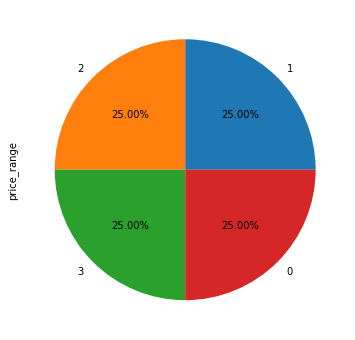

In [8]:
plt.figure(figsize=(10,6))
data['price_range'].value_counts().plot.pie(autopct='%.2f%%')

<AxesSubplot:>

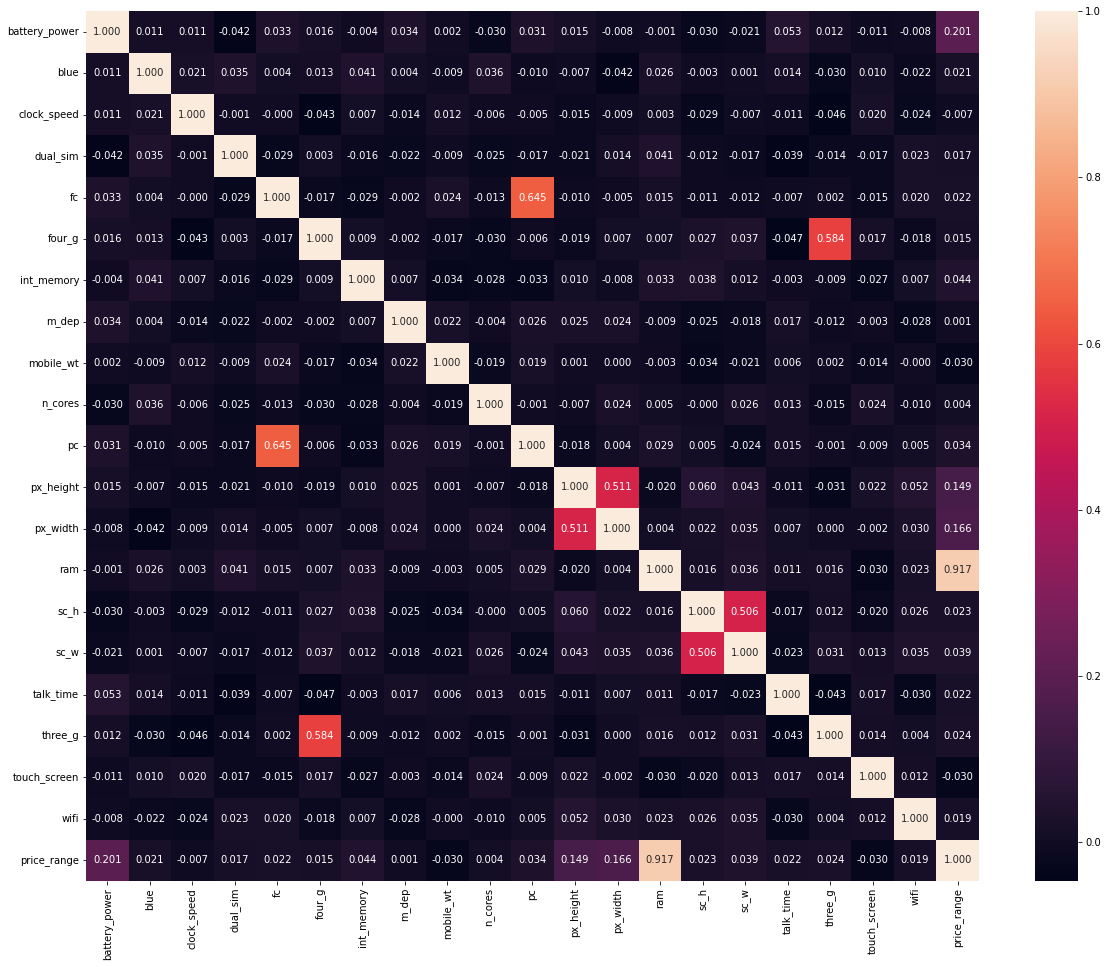

In [9]:
fig, ax = plt.subplots(figsize = (20, 16))
sns.heatmap(data.corr(), ax = ax, annot = True, fmt = ".3f")

<AxesSubplot:xlabel='price_range', ylabel='ram'>

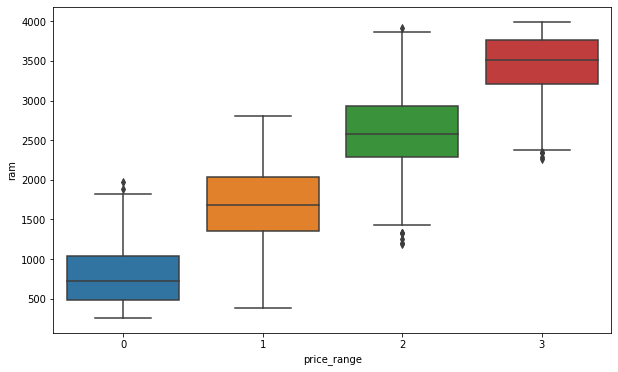

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['ram'],x=data['price_range'])

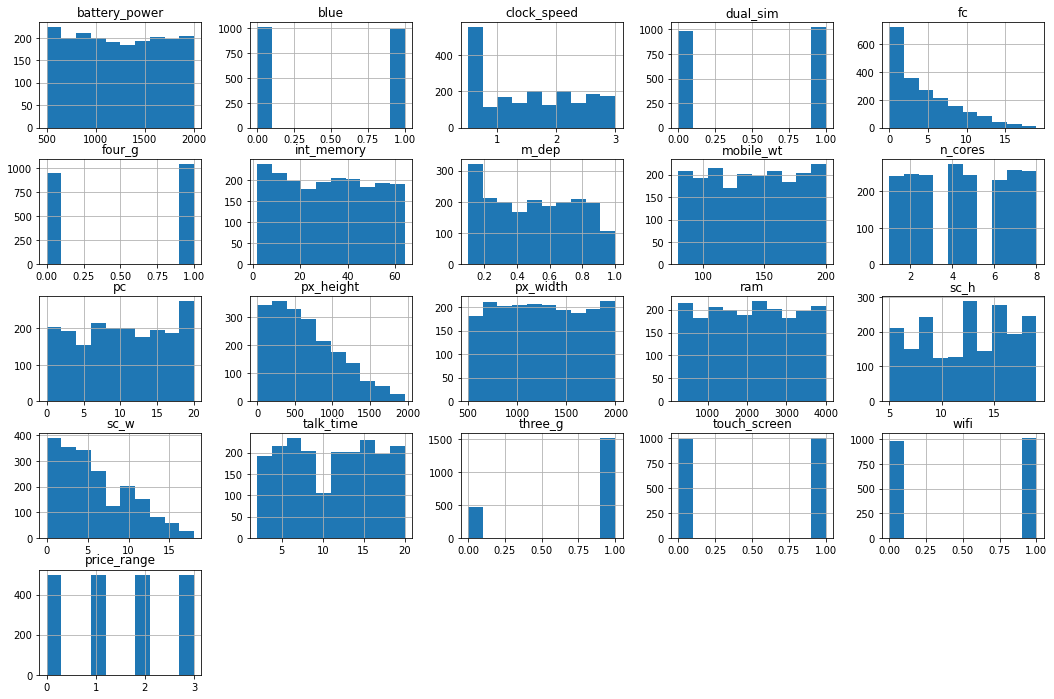

In [11]:
data_hist = data.hist(figsize=(18,12))

In [3]:
def MinMaxNormalisation(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

dataset = pd.read_csv("../data/train.csv")

# for column in dataset.columns[:-1]:
for column in dataset.columns:
    dataset[column] = MinMaxNormalisation(dataset[column])

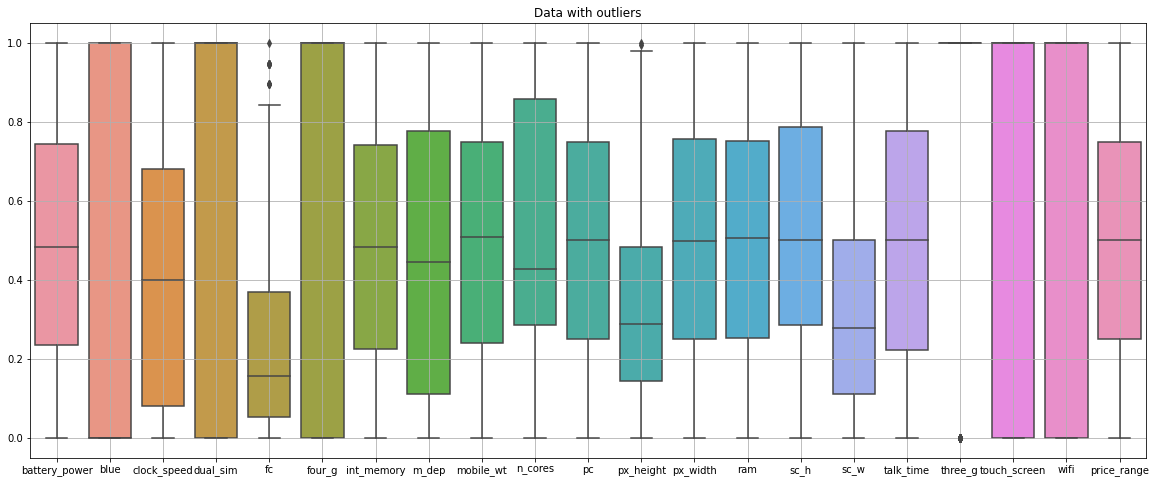

In [4]:
plt.figure(figsize=(20,8))
plt.title("Data with outliers")
sns.boxplot(data = dataset)
plt.grid()
plt.show()

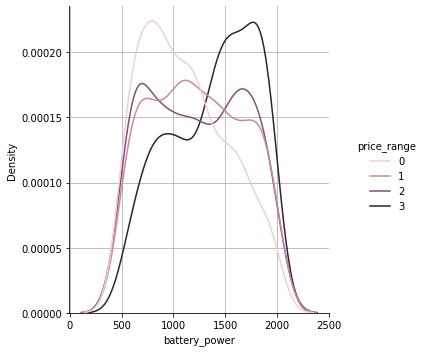

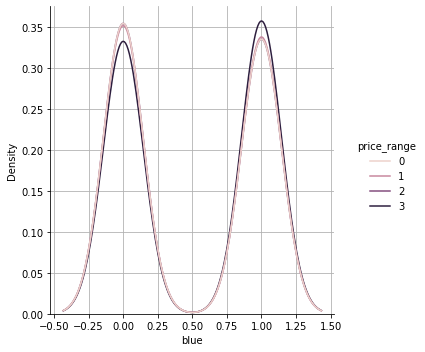

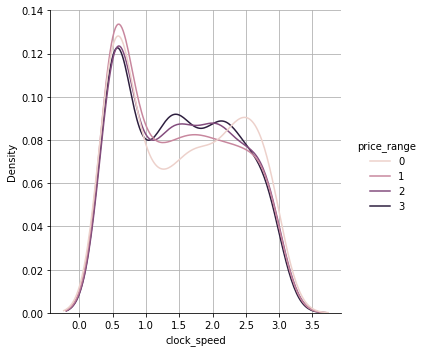

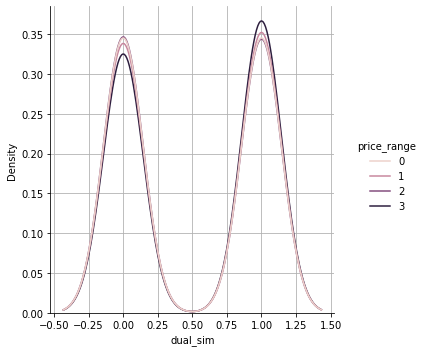

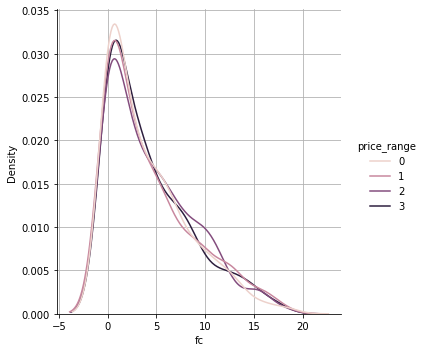

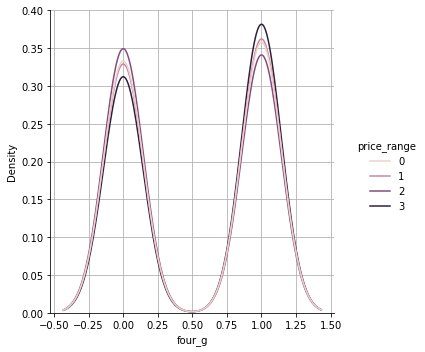

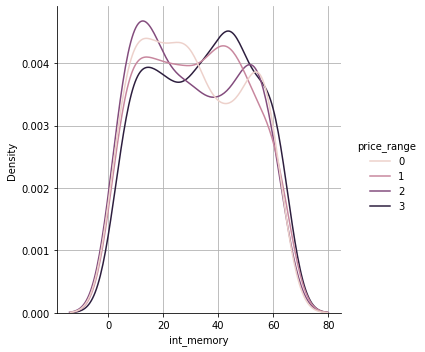

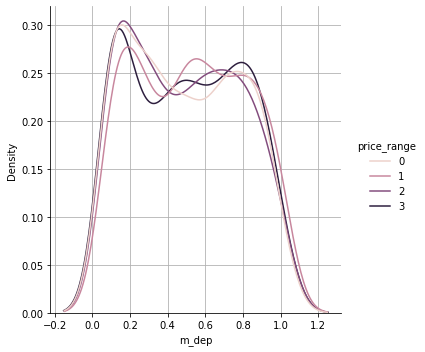

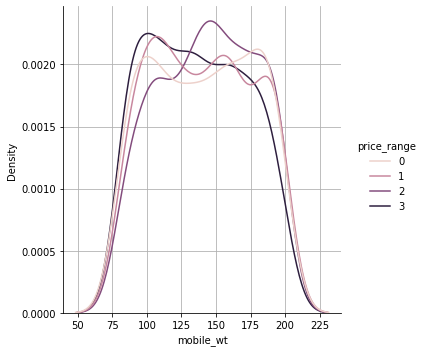

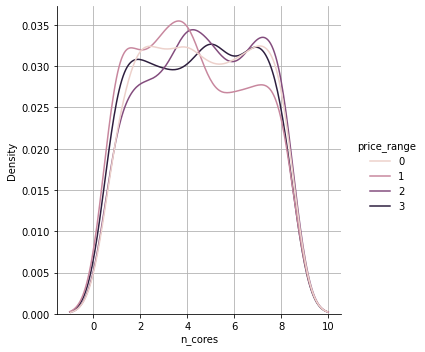

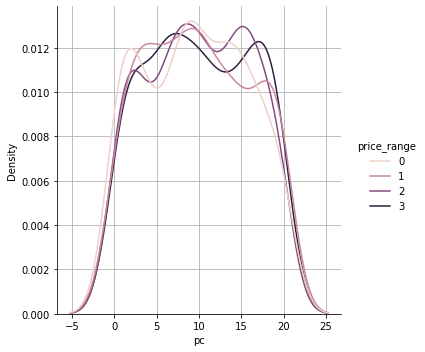

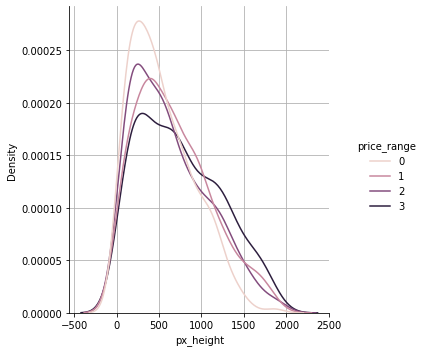

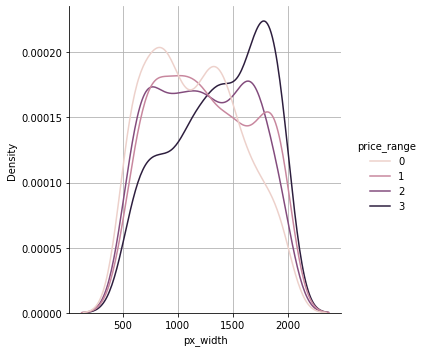

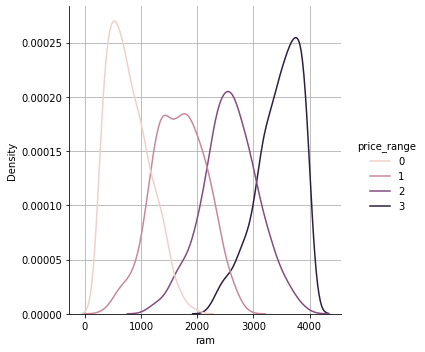

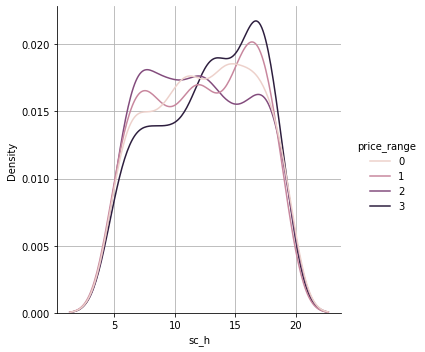

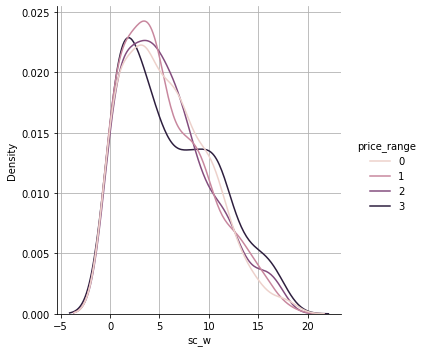

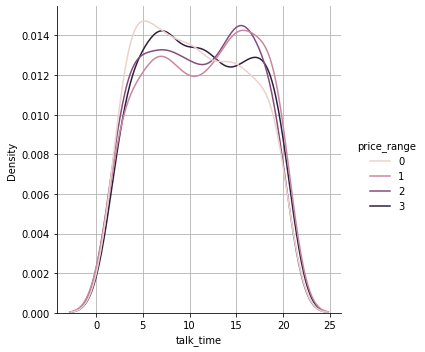

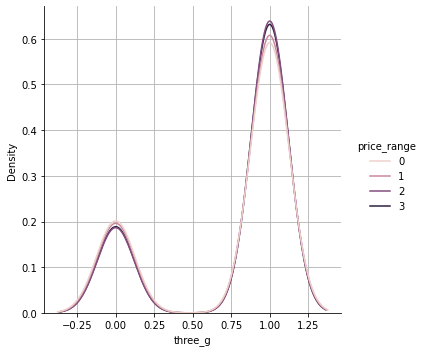

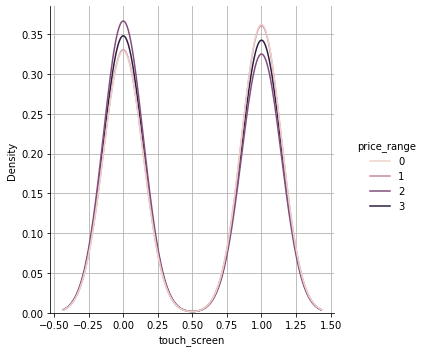

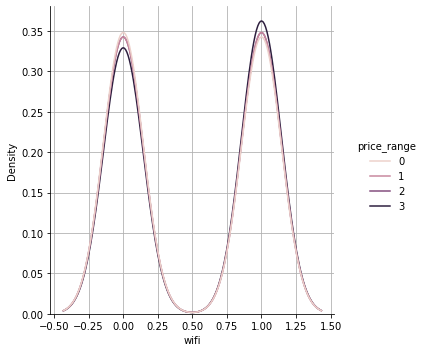

In [14]:
for colm in data.select_dtypes(np.number).columns[:-1]:
    sns.displot(data, x = colm,  hue="price_range", kind="kde", fill=False)
    plt.grid()
    plt.show()

In [5]:
input_data = dataset.drop('price_range', axis=1)

In [6]:
# # split the data 
# dataset = pd.read_csv("../data/train.csv")

# for column in dataset.columns[:-1]:
#     dataset[column] = MinMaxNormalisation(dataset[column])

# X_train, X_test, y_train, y_test = train_test_split(input_data, dataset['price_range'], test_size=0.15, random_state=1)

In [6]:
# load, normalize and split the data 
# training:validation (80:20)
dataset = pd.read_csv("../data/train.csv")

for column in dataset.columns[:-1]:
    dataset[column] = MinMaxNormalisation(dataset[column])

X_train, X_val, y_train, y_val = train_test_split(input_data, dataset['price_range'], test_size=0.2, random_state=1)

In [8]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,1.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,1.118314
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.750000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,1.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,2.250000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Tensorflow model

In [8]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_val)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/100
54/54 [==============================] - 2s 9ms/step - loss: 1.2011 - accuracy: 0.4894 - val_loss: 0.9242 - val_accuracy: 0.5633
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.7353 - val_loss: 0.5342 - val_accuracy: 0.7533
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4225 - accuracy: 0.8341 - val_loss: 0.4130 - val_accuracy: 0.8467
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3704 - accuracy: 0.8471 - val_loss: 0.3938 - val_accuracy: 0.8033
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.9018 - val_loss: 0.3068 - val_accuracy: 0.8567
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.2808 - accuracy: 0.8841 - val_loss: 0.2859 - val_accuracy: 0.8767
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.9312 - val_loss: 0.3610 - val_accuracy: 0.8400
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2926 - val_accuracy: 0.9200
Epoch 60/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3220 - val_accuracy: 0.9133
Epoch 61/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2945 - val_accuracy: 0.9067
Epoch 62/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3220 - val_accuracy: 0.9167
Epoch 63/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2991 - val_accuracy: 0.9067
Epoch 64/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3089 - val_accuracy: 0.9067
Epoch 65/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.9033
Epoch 

NameError: name 'X_test' is not defined

In [14]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history  = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_val)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/100
54/54 [==============================] - 1s 8ms/step - loss: 1.3437 - accuracy: 0.3647 - val_loss: 1.2793 - val_accuracy: 0.4300
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 1.1682 - accuracy: 0.4953 - val_loss: 1.0643 - val_accuracy: 0.5233
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.9495 - accuracy: 0.6082 - val_loss: 0.8867 - val_accuracy: 0.6600
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.8045 - accuracy: 0.7082 - val_loss: 0.7885 - val_accuracy: 0.7000
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.7025 - accuracy: 0.7835 - val_loss: 0.6954 - val_accuracy: 0.7467
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.8124 - val_loss: 0.6183 - val_accuracy: 0.8133
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5521 - accuracy: 0.8376 - val_loss: 0.5636 - val_accuracy: 0.8233
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.9818 - val_loss: 0.2088 - val_accuracy: 0.9100
Epoch 60/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0686 - accuracy: 0.9871 - val_loss: 0.1998 - val_accuracy: 0.9167
Epoch 61/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9882 - val_loss: 0.1954 - val_accuracy: 0.9000
Epoch 62/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9871 - val_loss: 0.2432 - val_accuracy: 0.8933
Epoch 63/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0694 - accuracy: 0.9841 - val_loss: 0.1962 - val_accuracy: 0.9133
Epoch 64/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9900 - val_loss: 0.1802 - val_accuracy: 0.9133
Epoch 65/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9865 - val_loss: 0.2440 - val_accuracy: 0.8867
Epoch 

In [35]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history  = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_val)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/300
54/54 [==============================] - 2s 8ms/step - loss: 1.4239 - accuracy: 0.2853 - val_loss: 1.3599 - val_accuracy: 0.3333
Epoch 2/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3770 - accuracy: 0.3047 - val_loss: 1.3483 - val_accuracy: 0.3733
Epoch 3/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3489 - accuracy: 0.3306 - val_loss: 1.3131 - val_accuracy: 0.4600
Epoch 4/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3132 - accuracy: 0.3418 - val_loss: 1.2562 - val_accuracy: 0.5100
Epoch 5/300
54/54 [==============================] - 0s 4ms/step - loss: 1.2648 - accuracy: 0.3759 - val_loss: 1.1720 - val_accuracy: 0.5333
Epoch 6/300
54/54 [==============================] - 0s 4ms/step - loss: 1.2083 - accuracy: 0.4312 - val_loss: 1.0810 - val_accuracy: 0.5900
Epoch 7/300
54/54 [==============================] - 0s 4ms/step - loss: 1.1427 - accuracy: 0.4571 - val_loss: 0.9993 - val_accuracy: 0.5800
Epoch 8/300
5

Epoch 59/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.8259 - val_loss: 0.2482 - val_accuracy: 0.9233
Epoch 60/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8341 - val_loss: 0.2435 - val_accuracy: 0.9367
Epoch 61/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8276 - val_loss: 0.2697 - val_accuracy: 0.9167
Epoch 62/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8324 - val_loss: 0.2507 - val_accuracy: 0.9200
Epoch 63/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4048 - accuracy: 0.8347 - val_loss: 0.2372 - val_accuracy: 0.9333
Epoch 64/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.8335 - val_loss: 0.2363 - val_accuracy: 0.9333
Epoch 65/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3982 - accuracy: 0.8418 - val_loss: 0.2315 - val_accuracy: 0.9333
Epoch 

54/54 [==============================] - 0s 5ms/step - loss: 0.2736 - accuracy: 0.9000 - val_loss: 0.1663 - val_accuracy: 0.9400
Epoch 174/300
54/54 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.9065 - val_loss: 0.1628 - val_accuracy: 0.9467
Epoch 175/300
54/54 [==============================] - 0s 7ms/step - loss: 0.2535 - accuracy: 0.8959 - val_loss: 0.1664 - val_accuracy: 0.9367
Epoch 176/300
54/54 [==============================] - 0s 8ms/step - loss: 0.2411 - accuracy: 0.9082 - val_loss: 0.1800 - val_accuracy: 0.9400
Epoch 177/300
54/54 [==============================] - 0s 7ms/step - loss: 0.2754 - accuracy: 0.8882 - val_loss: 0.1783 - val_accuracy: 0.9433
Epoch 178/300
54/54 [==============================] - 0s 5ms/step - loss: 0.2438 - accuracy: 0.9053 - val_loss: 0.1696 - val_accuracy: 0.9467
Epoch 179/300
54/54 [==============================] - 0s 5ms/step - loss: 0.2403 - accuracy: 0.9124 - val_loss: 0.1589 - val_accuracy: 0.9433
Epoch 180/300

54/54 [==============================] - 0s 4ms/step - loss: 0.2117 - accuracy: 0.9182 - val_loss: 0.1734 - val_accuracy: 0.9400
Epoch 288/300
54/54 [==============================] - 0s 5ms/step - loss: 0.1939 - accuracy: 0.9229 - val_loss: 0.1444 - val_accuracy: 0.9467
Epoch 289/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9271 - val_loss: 0.2468 - val_accuracy: 0.9100
Epoch 290/300
54/54 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9253 - val_loss: 0.1482 - val_accuracy: 0.9467
Epoch 291/300
54/54 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.9141 - val_loss: 0.1665 - val_accuracy: 0.9467
Epoch 292/300
54/54 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9165 - val_loss: 0.1656 - val_accuracy: 0.9367
Epoch 293/300
54/54 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9182 - val_loss: 0.1952 - val_accuracy: 0.9367
Epoch 294/300

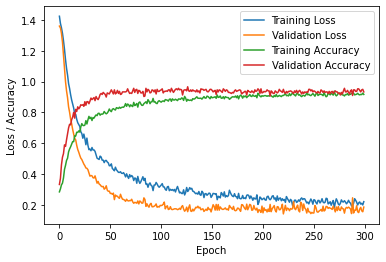

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [38]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history  = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_val)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/150
54/54 [==============================] - 1s 6ms/step - loss: 1.4570 - accuracy: 0.2388 - val_loss: 1.4254 - val_accuracy: 0.2500
Epoch 2/150
54/54 [==============================] - 0s 2ms/step - loss: 1.4010 - accuracy: 0.2712 - val_loss: 1.3936 - val_accuracy: 0.2533
Epoch 3/150
54/54 [==============================] - 0s 2ms/step - loss: 1.3728 - accuracy: 0.3282 - val_loss: 1.3682 - val_accuracy: 0.3067
Epoch 4/150
54/54 [==============================] - 0s 2ms/step - loss: 1.3457 - accuracy: 0.3682 - val_loss: 1.3409 - val_accuracy: 0.3067
Epoch 5/150
54/54 [==============================] - 0s 2ms/step - loss: 1.3107 - accuracy: 0.4012 - val_loss: 1.3060 - val_accuracy: 0.3867
Epoch 6/150
54/54 [==============================] - 0s 3ms/step - loss: 1.2678 - accuracy: 0.4553 - val_loss: 1.2625 - val_accuracy: 0.4333
Epoch 7/150
54/54 [==============================] - 0s 3ms/step - loss: 1.2200 - accuracy: 0.5053 - val_loss: 1.2160 - val_accuracy: 0.4767
Epoch 8/150
5

Epoch 59/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.9153 - val_loss: 0.3992 - val_accuracy: 0.8800
Epoch 60/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.9124 - val_loss: 0.3896 - val_accuracy: 0.8867
Epoch 61/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3386 - accuracy: 0.9124 - val_loss: 0.3868 - val_accuracy: 0.8800
Epoch 62/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.9141 - val_loss: 0.3874 - val_accuracy: 0.8800
Epoch 63/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.9141 - val_loss: 0.3765 - val_accuracy: 0.9000
Epoch 64/150
54/54 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.9147 - val_loss: 0.3707 - val_accuracy: 0.9133
Epoch 65/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.9159 - val_loss: 0.3690 - val_accuracy: 0.8967
Epoch 

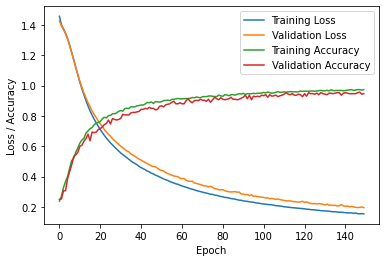

In [39]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [31]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history  = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_val)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/100
54/54 [==============================] - 1s 8ms/step - loss: 1.4401 - accuracy: 0.2341 - val_loss: 1.3963 - val_accuracy: 0.2400
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 1.3922 - accuracy: 0.2612 - val_loss: 1.3860 - val_accuracy: 0.2667
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 1.3773 - accuracy: 0.2918 - val_loss: 1.3759 - val_accuracy: 0.2800
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 1.3633 - accuracy: 0.3159 - val_loss: 1.3608 - val_accuracy: 0.2900
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 1.3443 - accuracy: 0.3635 - val_loss: 1.3343 - val_accuracy: 0.3667
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 1.3112 - accuracy: 0.4294 - val_loss: 1.2883 - val_accuracy: 0.4100
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 1.2477 - accuracy: 0.4741 - val_loss: 1.2032 - val_accuracy: 0.4867
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1489 - accuracy: 0.9565 - val_loss: 0.2048 - val_accuracy: 0.9167
Epoch 60/100
54/54 [==============================] - 0s 3ms/step - loss: 0.1481 - accuracy: 0.9518 - val_loss: 0.2427 - val_accuracy: 0.9000
Epoch 61/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9524 - val_loss: 0.2061 - val_accuracy: 0.9167
Epoch 62/100
54/54 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9612 - val_loss: 0.2029 - val_accuracy: 0.9233
Epoch 63/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1443 - accuracy: 0.9576 - val_loss: 0.2049 - val_accuracy: 0.9300
Epoch 64/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1433 - accuracy: 0.9529 - val_loss: 0.2018 - val_accuracy: 0.9100
Epoch 65/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1383 - accuracy: 0.9606 - val_loss: 0.1974 - val_accuracy: 0.9133
Epoch 

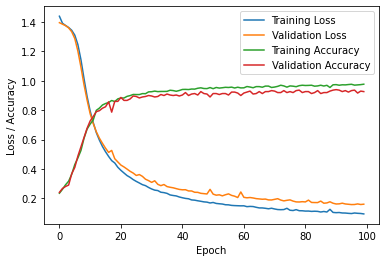

In [32]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [11]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5)

history  = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/300
54/54 [==============================] - 1s 8ms/step - loss: 1.5026 - accuracy: 0.2553 - val_loss: 1.3886 - val_accuracy: 0.2800
Epoch 2/300
54/54 [==============================] - 0s 4ms/step - loss: 1.4033 - accuracy: 0.2794 - val_loss: 1.3656 - val_accuracy: 0.3067
Epoch 3/300
54/54 [==============================] - 0s 3ms/step - loss: 1.3823 - accuracy: 0.2988 - val_loss: 1.3448 - val_accuracy: 0.3633
Epoch 4/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3409 - accuracy: 0.3282 - val_loss: 1.3243 - val_accuracy: 0.4133
Epoch 5/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3267 - accuracy: 0.3441 - val_loss: 1.2971 - val_accuracy: 0.4567
Epoch 6/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3039 - accuracy: 0.3771 - val_loss: 1.2638 - val_accuracy: 0.5000
Epoch 7/300
54/54 [==============================] - 0s 4ms/step - loss: 1.2669 - accuracy: 0.4082 - val_loss: 1.2297 - val_accuracy: 0.5433
Epoch 8/300
5

Epoch 59/300
54/54 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.8018 - val_loss: 0.4327 - val_accuracy: 0.8733
Epoch 60/300
54/54 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.8153 - val_loss: 0.4250 - val_accuracy: 0.8733
Epoch 61/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4879 - accuracy: 0.8088 - val_loss: 0.4232 - val_accuracy: 0.8700
Epoch 62/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.8071 - val_loss: 0.4169 - val_accuracy: 0.8833
Epoch 63/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4851 - accuracy: 0.8059 - val_loss: 0.4119 - val_accuracy: 0.8767
Epoch 64/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4718 - accuracy: 0.8194 - val_loss: 0.4066 - val_accuracy: 0.8800
Epoch 65/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4796 - accuracy: 0.8206 - val_loss: 0.4047 - val_accuracy: 0.8833
Epoch 

54/54 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.9165 - val_loss: 0.1819 - val_accuracy: 0.9400
Epoch 174/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.9088 - val_loss: 0.1795 - val_accuracy: 0.9467
Epoch 175/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2339 - accuracy: 0.9129 - val_loss: 0.1830 - val_accuracy: 0.9433
Epoch 176/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9135 - val_loss: 0.1732 - val_accuracy: 0.9500
Epoch 177/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 0.9159 - val_loss: 0.1818 - val_accuracy: 0.9433
Epoch 178/300
54/54 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9224 - val_loss: 0.1707 - val_accuracy: 0.9500
Epoch 179/300
54/54 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9194 - val_loss: 0.1722 - val_accuracy: 0.9467
Epoch 180/300

54/54 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9324 - val_loss: 0.1324 - val_accuracy: 0.9533
Epoch 288/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1570 - accuracy: 0.9488 - val_loss: 0.1329 - val_accuracy: 0.9500
Epoch 289/300
54/54 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.9459 - val_loss: 0.1322 - val_accuracy: 0.9467
Epoch 290/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9465 - val_loss: 0.1373 - val_accuracy: 0.9433
Epoch 291/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1617 - accuracy: 0.9429 - val_loss: 0.1365 - val_accuracy: 0.9533
Epoch 292/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9471 - val_loss: 0.1274 - val_accuracy: 0.9533
Epoch 293/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9429 - val_loss: 0.1349 - val_accuracy: 0.9467
Epoch 294/300

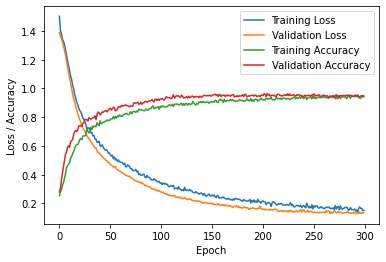

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [ ]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='tanh', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

history  = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

In [ ]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='LeakyReLU', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

history  = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [ ]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='LeakyReLU', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

history  = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

# Test

In [88]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='LeakyReLU', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5)

history  = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler,early_stop])


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/300
54/54 [==============================] - 1s 8ms/step - loss: 1.4451 - accuracy: 0.2818 - val_loss: 1.3707 - val_accuracy: 0.2967 - lr: 0.0010
Epoch 2/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3755 - accuracy: 0.3153 - val_loss: 1.3292 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 3/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3156 - accuracy: 0.3500 - val_loss: 1.2947 - val_accuracy: 0.3933 - lr: 0.0010
Epoch 4/300
54/54 [==============================] - 0s 4ms/step - loss: 1.2753 - accuracy: 0.3953 - val_loss: 1.2460 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 5/300
54/54 [==============================] - 0s 4ms/step - loss: 1.2321 - accuracy: 0.4453 - val_loss: 1.1990 - val_accuracy: 0.5100 - lr: 0.0010
Epoch 6/300
54/54 [==============================] - 0s 4ms/step - loss: 1.1823 - accuracy: 0.4594 - val_loss: 1.1431 - val_accuracy: 0.5300 - lr: 0.0010
Epoch 7/300
54/54 [==============================] - 0s 4ms/step - loss: 1.1

Epoch 54/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4150 - accuracy: 0.8506 - val_loss: 0.3821 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 55/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8435 - val_loss: 0.3853 - val_accuracy: 0.8733 - lr: 0.0010
Epoch 56/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4038 - accuracy: 0.8500 - val_loss: 0.3708 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 57/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4014 - accuracy: 0.8594 - val_loss: 0.3691 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 58/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3945 - accuracy: 0.8535 - val_loss: 0.3665 - val_accuracy: 0.8867 - lr: 0.0010
Epoch 59/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3939 - accuracy: 0.8571 - val_loss: 0.3649 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 60/300
54/54 [==============================] - 0s 4ms/step - lo

Epoch 107/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2484 - accuracy: 0.9171 - val_loss: 0.2192 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 108/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2432 - accuracy: 0.9112 - val_loss: 0.2163 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 109/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2369 - accuracy: 0.9194 - val_loss: 0.2211 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 110/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2369 - accuracy: 0.9200 - val_loss: 0.2157 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 111/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.9200 - val_loss: 0.2192 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 112/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2383 - accuracy: 0.9106 - val_loss: 0.2106 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 113/300
54/54 [==============================] - 0s 4ms/st

In [86]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='elu', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=9)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=6)

history  = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler,early_stop])


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/300
27/27 [==============================] - 2s 16ms/step - loss: 1.5613 - accuracy: 0.2571 - val_loss: 1.3776 - val_accuracy: 0.2767 - lr: 0.0010
Epoch 2/300
27/27 [==============================] - 0s 6ms/step - loss: 1.4545 - accuracy: 0.2835 - val_loss: 1.3226 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/300
27/27 [==============================] - 0s 5ms/step - loss: 1.4129 - accuracy: 0.3259 - val_loss: 1.2885 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 1.3599 - accuracy: 0.3294 - val_loss: 1.2410 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 5/300
27/27 [==============================] - 0s 5ms/step - loss: 1.2849 - accuracy: 0.3929 - val_loss: 1.1886 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 6/300
27/27 [==============================] - 0s 5ms/step - loss: 1.2304 - accuracy: 0.4065 - val_loss: 1.1295 - val_accuracy: 0.5567 - lr: 0.0010
Epoch 7/300
27/27 [==============================] - 0s 5ms/step - loss: 1.

Epoch 54/300
27/27 [==============================] - 0s 7ms/step - loss: 0.3893 - accuracy: 0.8465 - val_loss: 0.2700 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 55/300
27/27 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.8388 - val_loss: 0.2669 - val_accuracy: 0.9267 - lr: 0.0010
Epoch 56/300
27/27 [==============================] - 0s 6ms/step - loss: 0.3764 - accuracy: 0.8488 - val_loss: 0.2634 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 57/300
27/27 [==============================] - 0s 6ms/step - loss: 0.3482 - accuracy: 0.8629 - val_loss: 0.2608 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 58/300
27/27 [==============================] - 0s 6ms/step - loss: 0.3539 - accuracy: 0.8694 - val_loss: 0.2542 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 59/300
27/27 [==============================] - 0s 7ms/step - loss: 0.3961 - accuracy: 0.8441 - val_loss: 0.2488 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 60/300
27/27 [==============================] - 0s 6ms/step - lo

Epoch 107/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.9118 - val_loss: 0.1460 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 108/300
27/27 [==============================] - 0s 6ms/step - loss: 0.2389 - accuracy: 0.9035 - val_loss: 0.1630 - val_accuracy: 0.9300 - lr: 0.0010
Epoch 109/300
27/27 [==============================] - 0s 6ms/step - loss: 0.2409 - accuracy: 0.9106 - val_loss: 0.1587 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 110/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.8971 - val_loss: 0.1535 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 111/300
27/27 [==============================] - 0s 7ms/step - loss: 0.2407 - accuracy: 0.9071 - val_loss: 0.1489 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 112/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.9029 - val_loss: 0.1468 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 113/300
27/27 [==============================] - 0s 5ms/st

In [87]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=9)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=6)

history  = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler,early_stop])


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/300
27/27 [==============================] - 2s 15ms/step - loss: 1.6131 - accuracy: 0.2618 - val_loss: 1.3641 - val_accuracy: 0.2800 - lr: 0.0010
Epoch 2/300
27/27 [==============================] - 0s 8ms/step - loss: 1.5259 - accuracy: 0.2706 - val_loss: 1.3144 - val_accuracy: 0.3933 - lr: 0.0010
Epoch 3/300
27/27 [==============================] - 0s 5ms/step - loss: 1.4411 - accuracy: 0.2929 - val_loss: 1.2649 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 1.3687 - accuracy: 0.3388 - val_loss: 1.2219 - val_accuracy: 0.5433 - lr: 0.0010
Epoch 5/300
27/27 [==============================] - 0s 5ms/step - loss: 1.3080 - accuracy: 0.3800 - val_loss: 1.1760 - val_accuracy: 0.5567 - lr: 0.0010
Epoch 6/300
27/27 [==============================] - 0s 6ms/step - loss: 1.2483 - accuracy: 0.4135 - val_loss: 1.1237 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 7/300
27/27 [==============================] - 0s 5ms/step - loss: 1.

Epoch 54/300
27/27 [==============================] - 0s 5ms/step - loss: 0.3998 - accuracy: 0.8424 - val_loss: 0.2746 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 55/300
27/27 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8600 - val_loss: 0.2742 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 56/300
27/27 [==============================] - 0s 5ms/step - loss: 0.3838 - accuracy: 0.8535 - val_loss: 0.2592 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 57/300
27/27 [==============================] - 0s 5ms/step - loss: 0.3580 - accuracy: 0.8653 - val_loss: 0.2737 - val_accuracy: 0.9233 - lr: 0.0010
Epoch 58/300
27/27 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.8447 - val_loss: 0.2561 - val_accuracy: 0.9233 - lr: 0.0010
Epoch 59/300
27/27 [==============================] - 0s 5ms/step - loss: 0.3790 - accuracy: 0.8488 - val_loss: 0.2534 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 60/300
27/27 [==============================] - 0s 5ms/step - lo

Epoch 107/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2245 - accuracy: 0.9088 - val_loss: 0.1371 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 108/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2297 - accuracy: 0.9065 - val_loss: 0.1604 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 109/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2409 - accuracy: 0.9024 - val_loss: 0.1385 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 110/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2332 - accuracy: 0.9076 - val_loss: 0.1372 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 111/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.9118 - val_loss: 0.1341 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 112/300
27/27 [==============================] - 0s 5ms/step - loss: 0.2379 - accuracy: 0.9047 - val_loss: 0.1426 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 113/300
27/27 [==============================] - 0s 6ms/st

In [85]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='tanh', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=9)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=6)

history  = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler,early_stop])


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/300
54/54 [==============================] - 2s 10ms/step - loss: 1.5016 - accuracy: 0.2688 - val_loss: 1.4119 - val_accuracy: 0.3100 - lr: 0.0010
Epoch 2/300
54/54 [==============================] - 0s 4ms/step - loss: 1.4454 - accuracy: 0.2835 - val_loss: 1.3795 - val_accuracy: 0.3167 - lr: 0.0010
Epoch 3/300
54/54 [==============================] - 0s 4ms/step - loss: 1.4017 - accuracy: 0.3029 - val_loss: 1.3523 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 4/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3640 - accuracy: 0.3318 - val_loss: 1.3235 - val_accuracy: 0.3567 - lr: 0.0010
Epoch 5/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3217 - accuracy: 0.3388 - val_loss: 1.2957 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 6/300
54/54 [==============================] - 0s 5ms/step - loss: 1.2795 - accuracy: 0.3876 - val_loss: 1.2639 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 7/300
54/54 [==============================] - 0s 4ms/step - loss: 1.

Epoch 54/300
54/54 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.8182 - val_loss: 0.4685 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 55/300
54/54 [==============================] - 0s 4ms/step - loss: 0.5115 - accuracy: 0.8118 - val_loss: 0.4656 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 56/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4977 - accuracy: 0.8376 - val_loss: 0.4554 - val_accuracy: 0.8833 - lr: 0.0010
Epoch 57/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.8259 - val_loss: 0.4493 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 58/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.8324 - val_loss: 0.4434 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 59/300
54/54 [==============================] - 0s 4ms/step - loss: 0.4701 - accuracy: 0.8459 - val_loss: 0.4386 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 60/300
54/54 [==============================] - 0s 4ms/step - lo

Epoch 107/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3095 - accuracy: 0.8924 - val_loss: 0.2670 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 108/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3002 - accuracy: 0.8988 - val_loss: 0.2641 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 109/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.8941 - val_loss: 0.2608 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 110/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2924 - accuracy: 0.9041 - val_loss: 0.2597 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 111/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2925 - accuracy: 0.9088 - val_loss: 0.2575 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 112/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.9129 - val_loss: 0.2552 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 113/300
54/54 [==============================] - 0s 4ms/st

54/54 [==============================] - 0s 4ms/step - loss: 0.1672 - accuracy: 0.9524 - val_loss: 0.1574 - val_accuracy: 0.9533 - lr: 8.0000e-04
Epoch 212/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.9471 - val_loss: 0.1479 - val_accuracy: 0.9500 - lr: 8.0000e-04
Epoch 213/300
54/54 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9494 - val_loss: 0.1479 - val_accuracy: 0.9500 - lr: 8.0000e-04
Epoch 214/300
54/54 [==============================] - 0s 4ms/step - loss: 0.1699 - accuracy: 0.9435 - val_loss: 0.1470 - val_accuracy: 0.9533 - lr: 8.0000e-04
Epoch 215/300
54/54 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.9506 - val_loss: 0.1472 - val_accuracy: 0.9500 - lr: 8.0000e-04
Epoch 216/300
54/54 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9547 - val_loss: 0.1471 - val_accuracy: 0.9500 - lr: 8.0000e-04
Epoch 217/300
54/54 [==============================] -

In [84]:
X_test = X_val
y_test = y_val

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='LeakyReLU', input_shape=(20,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=9)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=6)

history  = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler,early_stop])


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions
predictions = model.predict(X_test)
print('Predictions:', np.argmax(predictions, axis=1))

Epoch 1/300
54/54 [==============================] - 2s 8ms/step - loss: 1.5166 - accuracy: 0.2659 - val_loss: 1.4046 - val_accuracy: 0.2733 - lr: 0.0010
Epoch 2/300
54/54 [==============================] - 0s 4ms/step - loss: 1.4110 - accuracy: 0.2782 - val_loss: 1.3757 - val_accuracy: 0.2767 - lr: 0.0010
Epoch 3/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3906 - accuracy: 0.3006 - val_loss: 1.3560 - val_accuracy: 0.3367 - lr: 0.0010
Epoch 4/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3601 - accuracy: 0.3171 - val_loss: 1.3354 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 5/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3461 - accuracy: 0.3235 - val_loss: 1.3115 - val_accuracy: 0.3900 - lr: 0.0010
Epoch 6/300
54/54 [==============================] - 0s 4ms/step - loss: 1.3130 - accuracy: 0.3447 - val_loss: 1.2838 - val_accuracy: 0.4267 - lr: 0.0010
Epoch 7/300
54/54 [==============================] - 0s 4ms/step - loss: 1.2

Epoch 54/300
54/54 [==============================] - 0s 4ms/step - loss: 0.5228 - accuracy: 0.8029 - val_loss: 0.4763 - val_accuracy: 0.8400 - lr: 0.0010
Epoch 55/300
54/54 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7924 - val_loss: 0.4617 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 56/300
54/54 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.8024 - val_loss: 0.4553 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 57/300
54/54 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7894 - val_loss: 0.4521 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 58/300
54/54 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.8141 - val_loss: 0.4430 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 59/300
54/54 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.8088 - val_loss: 0.4389 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 60/300
54/54 [==============================] - 0s 4ms/step - lo

Epoch 107/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3222 - accuracy: 0.8794 - val_loss: 0.2794 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 108/300
54/54 [==============================] - 0s 5ms/step - loss: 0.3234 - accuracy: 0.8882 - val_loss: 0.2760 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 109/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.8835 - val_loss: 0.2711 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 110/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3196 - accuracy: 0.8835 - val_loss: 0.2713 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 111/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.8865 - val_loss: 0.2689 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 112/300
54/54 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8841 - val_loss: 0.2672 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 113/300
54/54 [==============================] - 0s 4ms/st

54/54 [==============================] - 0s 4ms/step - loss: 0.1867 - accuracy: 0.9388 - val_loss: 0.1528 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 212/300
54/54 [==============================] - 0s 4ms/step - loss: 0.1764 - accuracy: 0.9388 - val_loss: 0.1553 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 213/300
54/54 [==============================] - 0s 5ms/step - loss: 0.1952 - accuracy: 0.9259 - val_loss: 0.1565 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 214/300
54/54 [==============================] - 0s 4ms/step - loss: 0.1742 - accuracy: 0.9406 - val_loss: 0.1523 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 215/300
54/54 [==============================] - 0s 4ms/step - loss: 0.2000 - accuracy: 0.9171 - val_loss: 0.1655 - val_accuracy: 0.9467 - lr: 0.0010
Epoch 216/300
54/54 [==============================] - 0s 4ms/step - loss: 0.1852 - accuracy: 0.9312 - val_loss: 0.1536 - val_accuracy: 0.9467 - lr: 8.0000e-04
Epoch 217/300
54/54 [==============================] - 0s 4ms/step - loss:

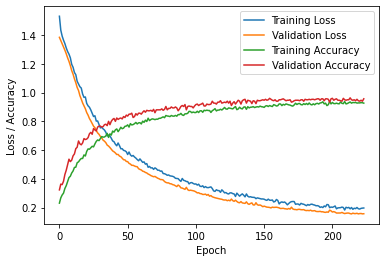

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

### PyTorch model

vylepsit konfigy, architektury poskusat, dropout, grafy, rozdelit mnoziny na 2

In [21]:
# load, normalize and split the data 
# training:validation (80:20)
dataset = pd.read_csv("../data/train.csv")

for column in dataset.columns[:-1]:
    dataset[column] = MinMaxNormalisation(dataset[column])

X_train, X_val, y_train, y_val = train_test_split(input_data, dataset['price_range'], test_size=0.2, random_state=1)

Epoch 1/500, Loss: 1.3857, Val Loss: 1.3665
Epoch 2/500, Loss: 1.3542, Val Loss: 1.3426
Epoch 3/500, Loss: 1.3190, Val Loss: 1.2987
Epoch 4/500, Loss: 1.2521, Val Loss: 1.2167
Epoch 5/500, Loss: 1.1437, Val Loss: 1.0933
Epoch 6/500, Loss: 1.0087, Val Loss: 0.9526
Epoch 7/500, Loss: 0.8795, Val Loss: 0.8378
Epoch 8/500, Loss: 0.7733, Val Loss: 0.7435
Epoch 9/500, Loss: 0.6862, Val Loss: 0.6663
Epoch 10/500, Loss: 0.6141, Val Loss: 0.6023
Epoch 11/500, Loss: 0.5541, Val Loss: 0.5489
Epoch 12/500, Loss: 0.5038, Val Loss: 0.5039
Epoch 13/500, Loss: 0.4613, Val Loss: 0.4655
Epoch 14/500, Loss: 0.4251, Val Loss: 0.4324
Epoch 15/500, Loss: 0.3938, Val Loss: 0.4037
Epoch 16/500, Loss: 0.3665, Val Loss: 0.3785
Epoch 17/500, Loss: 0.3427, Val Loss: 0.3564
Epoch 18/500, Loss: 0.3217, Val Loss: 0.3367
Epoch 19/500, Loss: 0.3030, Val Loss: 0.3191
Epoch 20/500, Loss: 0.2865, Val Loss: 0.3033
Epoch 21/500, Loss: 0.2717, Val Loss: 0.2892
Epoch 22/500, Loss: 0.2584, Val Loss: 0.2764
Epoch 23/500, Loss:

Epoch 182/500, Loss: 0.0440, Val Loss: 0.0868
Epoch 183/500, Loss: 0.0438, Val Loss: 0.0868
Epoch 184/500, Loss: 0.0436, Val Loss: 0.0868
Epoch 185/500, Loss: 0.0434, Val Loss: 0.0867
Epoch 186/500, Loss: 0.0431, Val Loss: 0.0867
Epoch 187/500, Loss: 0.0429, Val Loss: 0.0867
Epoch 188/500, Loss: 0.0427, Val Loss: 0.0867
Epoch 189/500, Loss: 0.0425, Val Loss: 0.0867
Epoch 190/500, Loss: 0.0423, Val Loss: 0.0867
Epoch 191/500, Loss: 0.0421, Val Loss: 0.0867
Epoch 192/500, Loss: 0.0419, Val Loss: 0.0867
Epoch 193/500, Loss: 0.0417, Val Loss: 0.0867
Epoch 194/500, Loss: 0.0415, Val Loss: 0.0867
Epoch 195/500, Loss: 0.0413, Val Loss: 0.0867
Epoch 196/500, Loss: 0.0411, Val Loss: 0.0867
Epoch 197/500, Loss: 0.0409, Val Loss: 0.0867
Epoch 198/500, Loss: 0.0402, Val Loss: 0.0833
EarlyStopping counter: 1 out of 10
Epoch 199/500, Loss: 0.0396, Val Loss: 0.0850
EarlyStopping counter: 2 out of 10
Epoch 200/500, Loss: 0.0377, Val Loss: 0.0870
EarlyStopping counter: 3 out of 10
Epoch 201/500, Loss: 

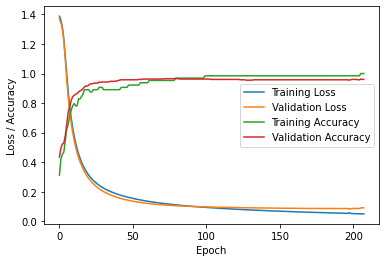

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
# from lightning.pytorch.callbacks.early_stopping import EarlyStopping


class EarlyStopping:
    def __init__(self, patience=10, delta=0, checkpoint_path='checkpoint.pt'):
        self.patience = patience
        self.delta = delta
        self.checkpoint_path = checkpoint_path
        self.best_loss = np.Inf
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss > self.best_loss + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            torch.save(model.state_dict(), self.checkpoint_path)
            self.best_loss = val_loss
            self.counter = 0

# Define the model architecture
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 4)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ELU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = Model()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=6)
# early_stop = EarlyStopping(optimizer, patience=2)

train_losses = []
val_losses = []
train_accs = []
val_accs = []

n_epochs = 300
batch_size = 64

early_stopping = EarlyStopping(patience=10, delta=0.001, checkpoint_path='checkpoint.pt')
for epoch in range(n_epochs):
    running_loss = 0.0
    for i in range(0, X_train.shape[0], batch_size):
        # Get a batch of data
        inputs = torch.from_numpy(X_train[i:i+batch_size].to_numpy()).float()
        labels = torch.from_numpy(y_train[i:i+batch_size].to_numpy()).long()

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / X_train.shape[0]
    
    # Evaluate on training data
    with torch.no_grad():
        model.eval()
        train_loss = criterion(model(inputs), labels)
        train_acc = torch.sum(torch.argmax(model(inputs), dim=1) == labels) / len(labels)
        train_losses.append(train_loss.item())
        train_accs.append(train_acc.item())

    # Evaluate on validation set
    with torch.no_grad():
        val_inputs = torch.from_numpy(X_val.to_numpy()).float()
        val_labels = torch.from_numpy(y_val.to_numpy()).long()
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels).item()
        val_losses.append(val_loss)
        val_preds = torch.argmax(val_outputs, axis=1).numpy()
        val_acc = (val_preds == y_val.to_numpy()).mean()
        val_accs.append(val_acc)

    # Update learning rate
    lr_scheduler.step(val_loss)
    early_stopping(val_loss, model)

    if early_stopping.early_stop:
        print('Early stopping')
        break

    # Print epoch statistics
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

# # Evaluate the model on val set
with torch.no_grad():
    val_inputs = torch.from_numpy(X_val.to_numpy()).float()
    val_labels = torch.from_numpy(y_val.to_numpy()).long()
    val_outputs = model(val_inputs)
    val_loss = criterion(val_outputs, val_labels).item()
    val_preds = torch.argmax(val_outputs, axis=1).numpy()
    val_acc = (val_preds == y_val.to_numpy()).mean()

print(f'Test accuracy: {val_acc:.4f}, Test loss: {val_loss:.4f}')

# # Plot loss and accuracy
# import matplotlib.pyplot as plt

# Plot the training and validation losses and accuracies
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()
